<div style="padding: 15px; border: 1px solid #d4edda; background-color: #d4edda; color: #155724; border-radius: 5px; font-size: 30px;">

  <strong> Feature Engineering </strong>
</div>



# **1.** Imports

In [1]:
import pickle
from utils import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [2]:
with open('train_val_split.pkl', 'rb') as f:
    data = pickle.load(f)

x_train = data['x_train']
x_val = data['x_val']
y_train = data['y_train']
y_val = data['y_val']

In [3]:
x_val

,text
4693,love fertility clinic decorate even thanks giv...
1599,irs investigator scrutinize bitcoin atm kiosk
9238,higher percent percent today clearing nearing ...
122,well fargo downgrade netflix spending concern
2475,docusign sign another solid earnings result TI...
...,...
7131,lot people feel defeated trump always win seem...
34,anchiano therapeutic downgraded peer perform o...
7109,wall street rally friday multi week win streak...
5855,corrected ex british airway executive indicted...


# **2.** Feature Engineering Methods

## **2.1** Bag of Words

In [4]:
bow = CountVectorizer(binary=True) # try also with CountVectorizer(ngram_range=(1,2), max_features=5000)
X_bow= bow.fit_transform(x_train['text'])

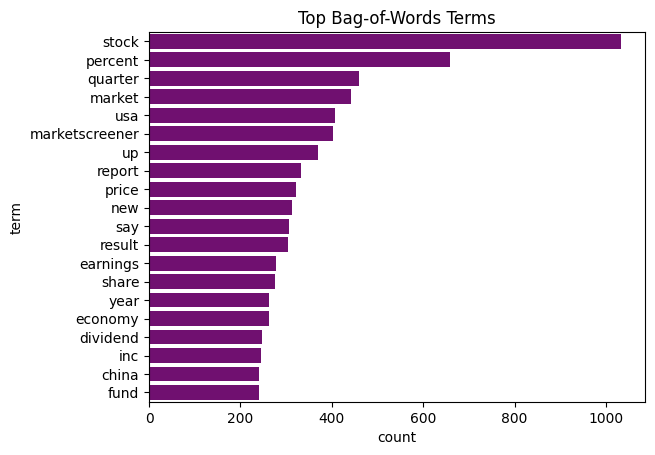

In [5]:
clean_bow_sum = np.array(X_bow.sum(axis=0)).flatten()
clean_terms = bow.get_feature_names_out()
clean_top = pd.DataFrame({'term': clean_terms, 'count': clean_bow_sum}).sort_values(by='count', ascending=False).head(20)

sns.barplot(data=clean_top, x='count', y='term', color='purple')
plt.title("Top Bag-of-Words Terms")
plt.show()

### **2.1.1** Testing K-Means

In [6]:
from sklearn.neighbors import KNeighborsClassifier
modelknn = KNeighborsClassifier(n_neighbors = 10, metric = 'cosine', weights = 'distance')
modelknn.fit(X_bow,y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10, weights='distance')

In [7]:
y_val

4693    2
1599    2
9238    1
122     0
2475    1
       ..
7131    2
34      0
7109    2
5855    2
3945    2
Name: label, Length: 1909, dtype: int64

In [8]:
y_pred = modelknn.predict(bow.transform(x_val['text']))

In [9]:
print(set(y_val))
print(set(y_pred))

{0, 1, 2}
{0, 1, 2}


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.41      0.74      0.52       159
           1       0.64      0.66      0.65       374
           2       0.92      0.83      0.87      1376

    accuracy                           0.79      1909
   macro avg       0.66      0.74      0.68      1909
weighted avg       0.82      0.79      0.80      1909



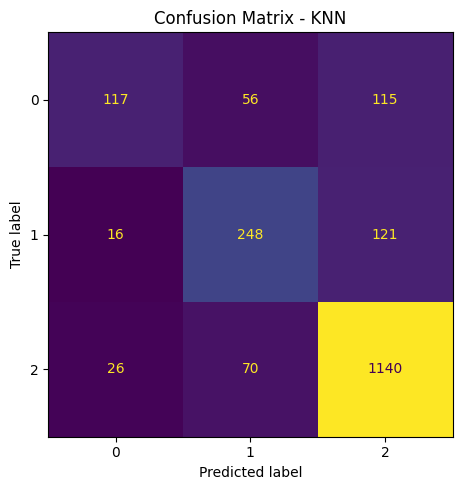

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, colorbar=False)
ax.set_title("Confusion Matrix - KNN")
plt.tight_layout()
plt.show()

### **2.1.2** Naive Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_bow.toarray(), y_train)

MultinomialNB()

In [28]:
x_val['text']

4693    love fertility clinic decorate even thanks giv...
1599        irs investigator scrutinize bitcoin atm kiosk
9238    higher percent percent today clearing nearing ...
122         well fargo downgrade netflix spending concern
2475    docusign sign another solid earnings result TI...
                              ...                        
7131    lot people feel defeated trump always win seem...
34      anchiano therapeutic downgraded peer perform o...
7109    wall street rally friday multi week win streak...
5855    corrected ex british airway executive indicted...
3945                           mikecaymantrades sometimes
Name: text, Length: 1909, dtype: object

In [30]:
X_val_bow = bow.transform(x_val['text']) 
nb_pred = nb.predict(X_val_bow)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_val, nb_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix(nb_pred, y_val)

              precision    recall  f1-score   support

           0       0.76      0.44      0.56       288
           1       0.71      0.63      0.66       385
           2       0.82      0.93      0.87      1236

    accuracy                           0.80      1909
   macro avg       0.76      0.67      0.70      1909
weighted avg       0.79      0.80      0.78      1909



array([[ 126,   12,   28],
       [  43,  241,   56],
       [ 119,  132, 1152]])

## **2.2** TF-IDF

In [13]:
tfidf = TfidfVectorizer(max_df=0.8, ngram_range=(1,1))

In [14]:
X_ng = tfidf.fit_transform(x_train['text']).toarray()

In [15]:
tfidf.get_feature_names_out()

array(['aaa', 'aal', 'aaoi', ..., 'zyen', 'zynex', 'zynga'], dtype=object)

In [16]:
tfidf.vocabulary_

{'nasdaq': 6787,
 'price': 7946,
 'percent': 7557,
 'senior': 9106,
 'note': 7019,
 'future': 4204,
 'up': 12021,
 'november': 7036,
 'nonfarm': 6976,
 'private': 7971,
 'payroll': 7509,
 'consensus': 2246,
 'ticker_econx': 10824,
 'twitter': 11866,
 'user': 12068,
 'explain': 3723,
 'kohl': 5686,
 'stock': 9737,
 'got': 4438,
 'obliterated': 7107,
 'reporting': 8508,
 'earnings': 3237,
 'agilysys': 260,
 'restaurant': 8570,
 'find': 3937,
 'sustainable': 9953,
 'method': 6454,
 'limiting': 5951,
 'food': 4050,
 'waste': 12313,
 'holiday': 4823,
 'make': 6179,
 'retirement': 8598,
 'top': 11656,
 'ranked': 8242,
 'mutual': 6744,
 'fund': 4191,
 'february': 3863,
 'could': 2394,
 'applied': 590,
 'dna': 3048,
 'science': 8997,
 'inc': 5100,
 'apdn': 569,
 'see': 9066,
 'reversal': 8622,
 'breaking': 1378,
 'week': 12362,
 'low': 6080,
 'lamp': 5752,
 'news': 6890,
 'usmca': 12071,
 'affect': 225,
 'usa': 12060,
 'steelmaker': 9700,
 'auto': 818,
 'manufacturer': 6226,
 'manchester': 620

In [17]:
#Get the IDF (Inverse Document Frequency) score for each feature (term) in the same order as the vocabulary.
idf_dict = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

# Get the first 10 items
idf_dict_10 = dict(list(idf_dict.items())[4100:4110])

print(idf_dict_10)

{'fought': 9.247351037092788, 'found': 7.637913124658687, 'foundation': 8.841885928984624, 'founded': 9.247351037092788, 'founder': 6.8959757799293095, 'four': 6.996059238486293, 'fourth': 5.9515141710884585, 'fowl': 9.247351037092788, 'fox': 8.554203856532842, 'foxbusiness': 8.554203856532842}


### **2.2.1** Testing K-Means

In [18]:
from sklearn.neighbors import KNeighborsClassifier
modelknn = KNeighborsClassifier(n_neighbors = 10, metric = 'cosine', weights = 'distance')
modelknn.fit(X_ng,y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10, weights='distance')

In [19]:
y_pred = modelknn.predict(tfidf.transform(x_val))

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_val))

ValueError: Found input variables with inconsistent numbers of samples: [1, 1909]

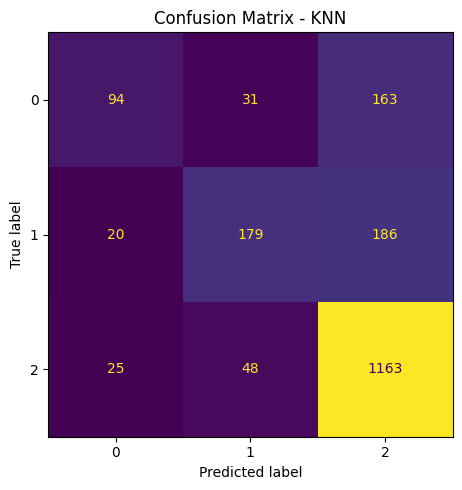

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, colorbar=False)
ax.set_title("Confusion Matrix - KNN")
plt.tight_layout()
plt.show()

## **2.3** Word 2 Vec

In [39]:
!pip install gensim
from gensim.models import Word2Vec
from keras_preprocessing.sequence import pad_sequences

In [40]:
corpus = x_train['text']

In [41]:
#get list with lenghts of sentences
train_len = []
for i in corpus:
    train_len.append(len(i))

In [42]:
max(train_len)

266

In [45]:
model = Word2Vec(
    sentences=corpus,
    vector_size=266,    # size of the embedding vectors 
    window=2,         # context window size
    min_count=1,      # minimum word frequency to include
    sg=1              # 1 for skip-gram; 0 for CBOW
)

In [51]:
corpus

2186             nasdaq price percent percent senior note
6819                                            future up
6157    november nonfarm private payroll k v k consens...
2462    twitter user explain kohl stock got obliterate...
4097    agilysys restaurant find sustainable method li...
                              ...                        
2807                       japan tobacco report fy result
704     fed emergence power player pose new risk indep...
990     rise home fitness service could benefit lulule...
4362                       daniel loeb top buy rd quarter
7664    zee entertainment subhash chandra resigns chai...
Name: text, Length: 7634, dtype: object

In [53]:
if isinstance(corpus[0], str):
   corpus = [sentence.split() for sentence in corpus]

In [56]:
vec = model.wv("")

TypeError: 'KeyedVectors' object is not callable